In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
customer = pd.read_csv("/Users/Dell/Downloads/customer.csv",encoding='ISO-8859-1')
sales = pd.read_csv("/Users/Dell/Downloads/sales.csv",encoding='ISO-8859-1')
cities = pd.read_csv("/Users/Dell/Downloads/cities.csv",encoding='ISO-8859-1')
items = pd.read_csv("/Users/Dell/Downloads/item.csv",encoding='ISO-8859-1')

In [3]:
customer.isna().sum()

Customer           0
Customer Number    0
City Code          0
dtype: int64

In [4]:
sales.isna().sum()

Manager             0
Manager Number      0
Path                0
Sales Rep Name      0
Sales Rep Name1     0
Sales Rep Name2     5
Sales Rep Name3    25
Sales Rep ID        0
dtype: int64

In [5]:
sales_new = sales.fillna('unknown')

In [6]:
cities.isna().sum()

City         0
City Code    0
Region       0
Latitude     0
Longitude    0
Desc         1
dtype: int64

In [7]:
cities_new = cities.dropna()

In [8]:
items.isna().sum()

Item Number          0
Product Group        0
Product Line         0
Product Sub Group    0
Product Type         0
dtype: int64

In [9]:
customer_cities = pd.merge(customer, cities_new, on="City Code")

In [10]:
customer_cities

,Customer,Customer Number,City Code,City,Region,Latitude,Longitude,Desc
0,A Superior System,10000453,1,New York,USA,40.730599,-73.986581,"""New York City, NY, US"""
1,Beech Aircraft Corporation,10003882,1,New York,USA,40.730599,-73.986581,"""New York City, NY, US"""
2,Deere and Company,10009863,1,New York,USA,40.730599,-73.986581,"""New York City, NY, US"""
3,Gailey Enterprises,10012851,1,New York,USA,40.730599,-73.986581,"""New York City, NY, US"""
4,J.A. Bauer Pottery Company,10017852,1,New York,USA,40.730599,-73.986581,"""New York City, NY, US"""
...,...,...,...,...,...,...,...,...
666,Heurikon,10015824,60,Bolton,UK,53.577694,-2.428887,"""Bolton, Cumbria, England, GB"""
667,LiveWORLD,10019909,60,Bolton,UK,53.577694,-2.428887,"""Bolton, Cumbria, England, GB"""
668,Qwest,10022423,60,Bolton,UK,53.577694,-2.428887,"""Bolton, Cumbria, England, GB"""
669,Tailwind,10025021,60,Bolton,UK,53.577694,-2.428887,"""Bolton, Cumbria, England, GB"""


In [11]:
sales_items = pd.concat([sales_new, items], axis=1, join='inner')

In [12]:
sales_items

,Manager,Manager Number,Path,Sales Rep Name,Sales Rep Name1,Sales Rep Name2,Sales Rep Name3,Sales Rep ID,Item Number,Product Group,Product Line,Product Sub Group,Product Type
0,Amanda Honda,104,Amanda Honda-Amalia Craig,Amalia Craig,Amanda Honda,Amalia Craig,unknown,103,10001,Beverages,Drink,Juice,Pure Juice Beverages
1,Amanda Honda,104,Amanda Honda-Cart Lynch,Cart Lynch,Amanda Honda,Cart Lynch,unknown,112,10002,Beverages,Drink,Flavored Drinks,Drinks
2,Amanda Honda,104,Amanda Honda-Molly McKenzie,Molly McKenzie,Amanda Honda,Molly McKenzie,unknown,159,10003,Beverages,Drink,Flavored Drinks,Drinks
3,Amanda Honda,104,Amanda Honda-Sheila Hein,Sheila Hein,Amanda Honda,Sheila Hein,unknown,176,10004,Beverages,Drink,Soda,Carbonated Beverages
4,Brenda Gibson,109,Brenda Gibson-Dennis Johnson,Dennis Johnson,Brenda Gibson,Dennis Johnson,unknown,121,10005,Beverages,Drink,Soda,Carbonated Beverages
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,Amanda Honda,104,Amanda Honda,Amanda Honda,Amanda Honda,unknown,unknown,104,10063,Deli,Food,Hot Dogs,Meat
60,Brenda Gibson,109,Brenda Gibson,Brenda Gibson,Brenda Gibson,unknown,unknown,109,10064,Deli,Food,Bologna,Meat
61,John Greg,134,John Greg,John Greg,John Greg,unknown,unknown,134,10065,Deli,Food,Bologna,Meat
62,Samantha Allen,169,Samantha Allen,Samantha Allen,Samantha Allen,unknown,unknown,169,10066,Deli,Food,Bologna,Meat


In [13]:
sales_items.isna().sum()

Manager              0
Manager Number       0
Path                 0
Sales Rep Name       0
Sales Rep Name1      0
Sales Rep Name2      0
Sales Rep Name3      0
Sales Rep ID         0
Item Number          0
Product Group        0
Product Line         0
Product Sub Group    0
Product Type         0
dtype: int64

In [14]:
final = pd.concat([customer_cities, sales_items], axis=1, join='inner')

In [15]:
final

,Customer,Customer Number,City Code,City,Region,Latitude,Longitude,Desc,Manager,Manager Number,...,Sales Rep Name,Sales Rep Name1,Sales Rep Name2,Sales Rep Name3,Sales Rep ID,Item Number,Product Group,Product Line,Product Sub Group,Product Type
0,A Superior System,10000453,1,New York,USA,40.730599,-73.986581,"""New York City, NY, US""",Amanda Honda,104,...,Amalia Craig,Amanda Honda,Amalia Craig,unknown,103,10001,Beverages,Drink,Juice,Pure Juice Beverages
1,Beech Aircraft Corporation,10003882,1,New York,USA,40.730599,-73.986581,"""New York City, NY, US""",Amanda Honda,104,...,Cart Lynch,Amanda Honda,Cart Lynch,unknown,112,10002,Beverages,Drink,Flavored Drinks,Drinks
2,Deere and Company,10009863,1,New York,USA,40.730599,-73.986581,"""New York City, NY, US""",Amanda Honda,104,...,Molly McKenzie,Amanda Honda,Molly McKenzie,unknown,159,10003,Beverages,Drink,Flavored Drinks,Drinks
3,Gailey Enterprises,10012851,1,New York,USA,40.730599,-73.986581,"""New York City, NY, US""",Amanda Honda,104,...,Sheila Hein,Amanda Honda,Sheila Hein,unknown,176,10004,Beverages,Drink,Soda,Carbonated Beverages
4,J.A. Bauer Pottery Company,10017852,1,New York,USA,40.730599,-73.986581,"""New York City, NY, US""",Brenda Gibson,109,...,Dennis Johnson,Brenda Gibson,Dennis Johnson,unknown,121,10005,Beverages,Drink,Soda,Carbonated Beverages
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,Galaxy Marketing Associates,10012907,3,Chicago,USA,41.875555,-87.624421,"""Chicago, Cook County, IL, US""",Amanda Honda,104,...,Amanda Honda,Amanda Honda,unknown,unknown,104,10063,Deli,Food,Hot Dogs,Meat
60,Johnson and Higgins,10018352,3,Chicago,USA,41.875555,-87.624421,"""Chicago, Cook County, IL, US""",Brenda Gibson,109,...,Brenda Gibson,Brenda Gibson,unknown,unknown,109,10064,Deli,Food,Bologna,Meat
61,One Planet Solutions,10020864,3,Chicago,USA,41.875555,-87.624421,"""Chicago, Cook County, IL, US""",John Greg,134,...,John Greg,John Greg,unknown,unknown,134,10065,Deli,Food,Bologna,Meat
62,Relcom,10022978,3,Chicago,USA,41.875555,-87.624421,"""Chicago, Cook County, IL, US""",Samantha Allen,169,...,Samantha Allen,Samantha Allen,unknown,unknown,169,10066,Deli,Food,Bologna,Meat


In [16]:
final.isna().sum()

Customer             0
Customer Number      0
City Code            0
City                 0
Region               0
Latitude             0
Longitude            0
Desc                 0
Manager              0
Manager Number       0
Path                 0
Sales Rep Name       0
Sales Rep Name1      0
Sales Rep Name2      0
Sales Rep Name3      0
Sales Rep ID         0
Item Number          0
Product Group        0
Product Line         0
Product Sub Group    0
Product Type         0
dtype: int64

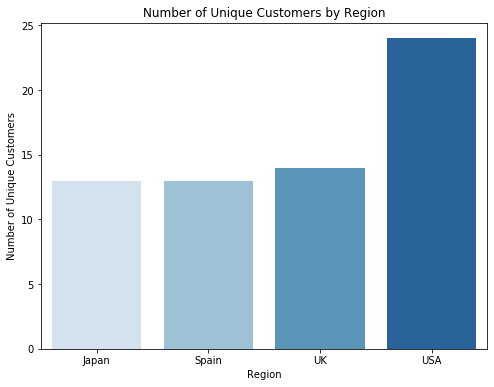

In [17]:
# Calculate the total number of unique customers in each region
unique_customers_by_region = final.groupby('Region')['Customer Number'].nunique()

# Create a bar chart to visualize the number of unique customers in each region
plt.figure(figsize=(8, 6))
sns.barplot(x=unique_customers_by_region.index, y=unique_customers_by_region.values, palette='Blues')
plt.xlabel('Region')
plt.ylabel('Number of Unique Customers')
plt.title('Number of Unique Customers by Region')
plt.show()

Text(0, 0.5, 'Product Line')

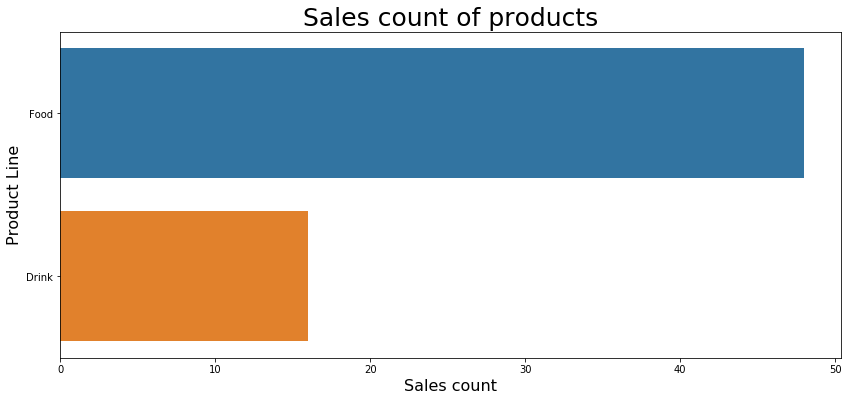

In [18]:
plt.figure(figsize=(14,6))
ax = sns.countplot(y='Product Line', data=final, order = final['Product Line'].value_counts().index)
ax.set_title(label = "Sales count of products", fontsize = 25)
ax.set_xlabel(xlabel = "Sales count", fontsize = 16)
ax.set_ylabel(ylabel= "Product Line", fontsize = 16)

Text(0, 0.5, 'Product Type')

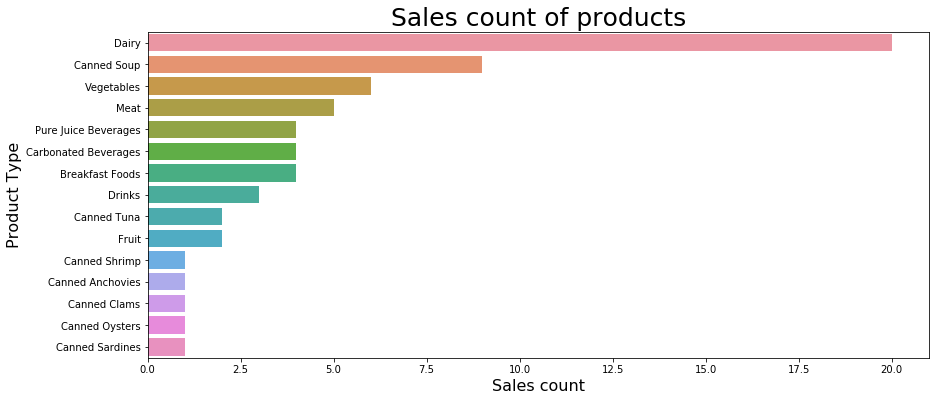

In [19]:
plt.figure(figsize=(14,6))
ax = sns.countplot(y='Product Type', data=final, order = final['Product Type'].value_counts().index)
ax.set_title(label = "Sales count of products", fontsize = 25)
ax.set_xlabel(xlabel = "Sales count", fontsize = 16)
ax.set_ylabel(ylabel= "Product Type", fontsize = 16)

Text(0, 0.5, 'Product Group')

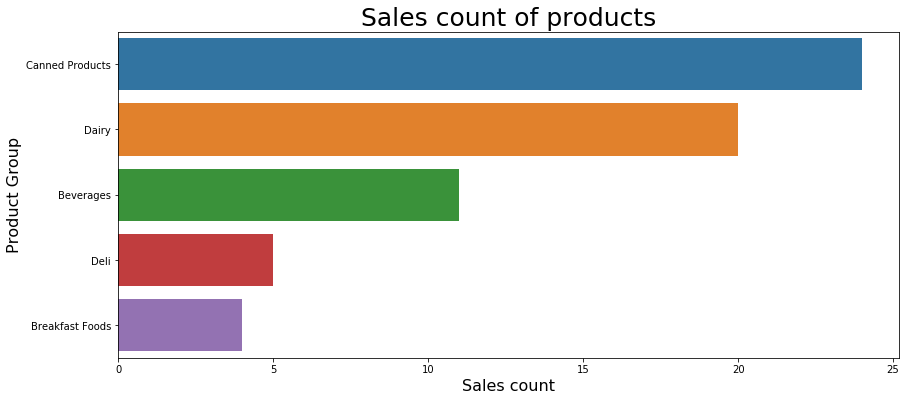

In [20]:
plt.figure(figsize=(14,6))
ax = sns.countplot(y='Product Group', data=final, order = final['Product Group'].value_counts().index)
ax.set_title(label = "Sales count of products", fontsize = 25)
ax.set_xlabel(xlabel = "Sales count", fontsize = 16)
ax.set_ylabel(ylabel= "Product Group", fontsize = 16)

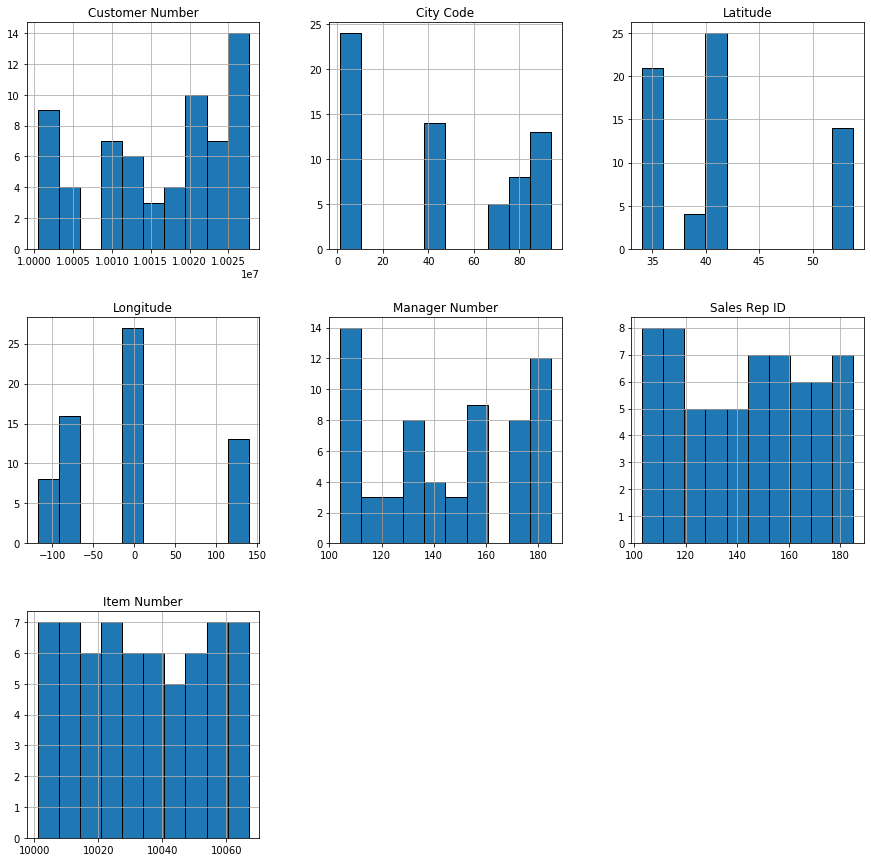

In [21]:
final.hist(figsize=(15,15),edgecolor='black');

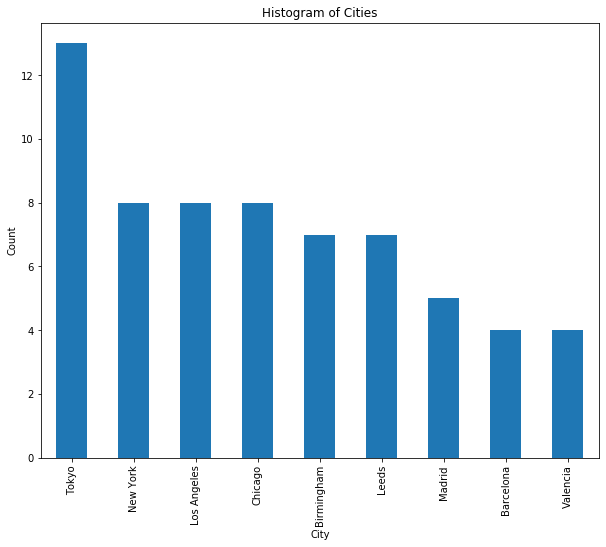

In [22]:
plt.figure(figsize=(10, 8))
#Plot a histrogram of cities
final["City"].value_counts().plot(kind="bar")

plt.title("Histogram of Cities")
plt.xlabel("City")
plt.ylabel("Count")

plt.show()

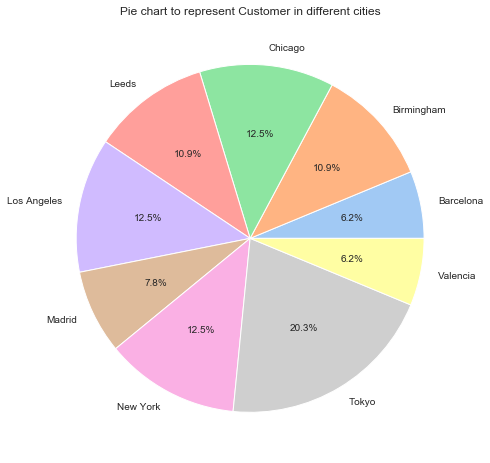

In [25]:
data = final.groupby('City')['Customer'].nunique()

# Create a pie chart
plt.figure(figsize=(12, 8))
sns.set_style('whitegrid')
plt.pie(data.values, labels=data.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Pie chart to represent Customer in different cities')
plt.show()

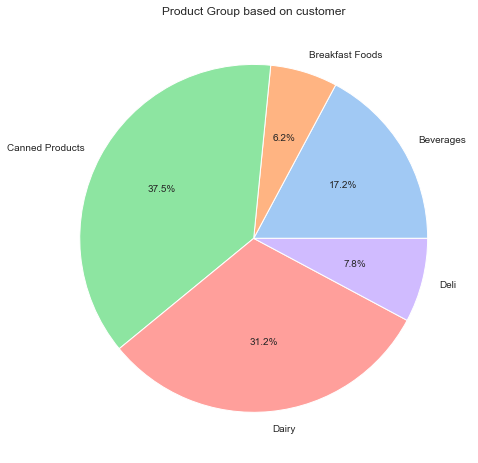

In [26]:
# Calculate the number of sales reps in each sales rep manager's team
data = final.groupby('Product Group')['Customer'].nunique()

# Create a pie chart 
plt.figure(figsize=(12, 8))
sns.set_style('whitegrid')
plt.pie(data.values, labels=data.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Product Group based on customer')
plt.show()

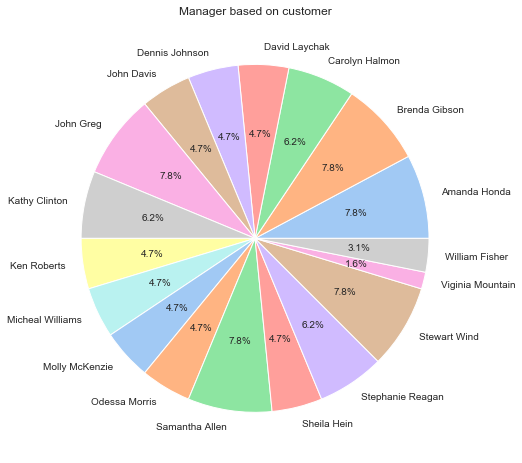

In [28]:
data = final.groupby('Manager')['Customer'].nunique()

# Create a pie chart to visualize 
plt.figure(figsize=(10, 8))
sns.set_style('whitegrid')
plt.pie(data.values, labels=data.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Manager based on customer')
plt.show()

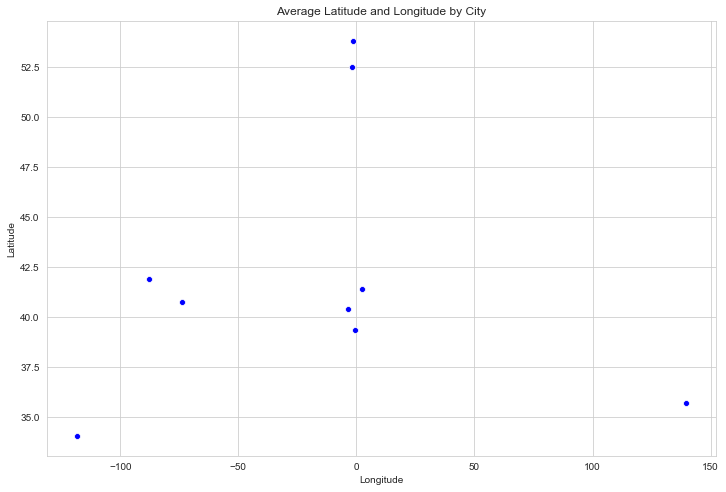

In [29]:
# Calculate the average latitude and longitude for each city
avg_lat_long_by_city = final.groupby('City')[['Latitude', 'Longitude']].mean()

# Create a scatter plot to visualize the average latitude and longitude for each city
plt.figure(figsize=(12, 8))
sns.scatterplot(x=avg_lat_long_by_city['Longitude'], y=avg_lat_long_by_city['Latitude'], color='blue')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Average Latitude and Longitude by City')
plt.show()

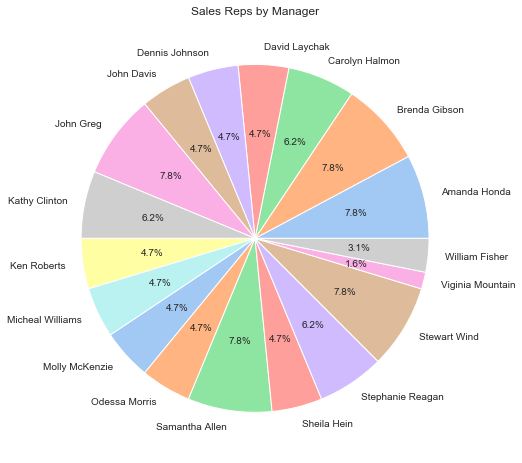

In [30]:
# Calculate the number of sales reps in each sales rep manager's team
sales_reps_by_manager = final.groupby('Manager')['Sales Rep ID'].nunique()

# Create a pie chart to visualize the number of sales reps in each sales rep manager's team
plt.figure(figsize=(12, 8))
sns.set_style('whitegrid')
plt.pie(sales_reps_by_manager.values, labels=sales_reps_by_manager.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Sales Reps by Manager')
plt.show()

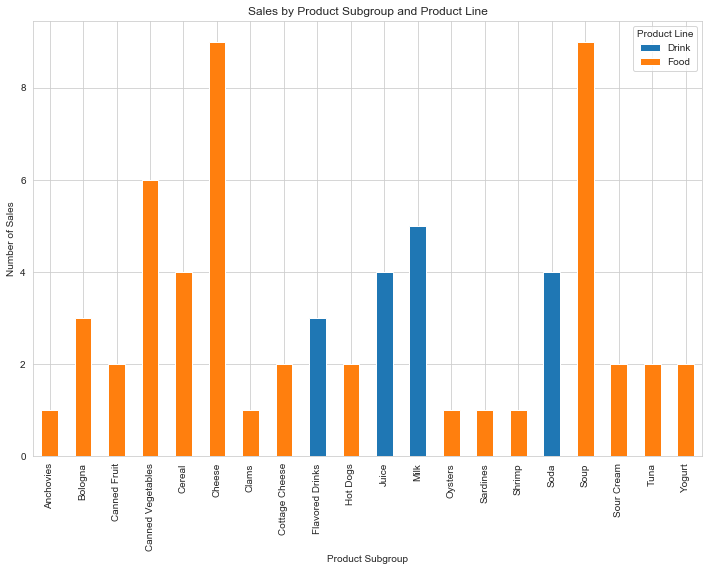

In [31]:
# Group the sales data by product subgroup and product line
grouped_data = final.groupby(['Product Sub Group', 'Product Line']).agg({'Customer': 'count'})

# Pivot the grouped data to create a matrix of counts by subgroup and line
pivoted_data = grouped_data.pivot_table(values='Customer', index='Product Sub Group', columns='Product Line', fill_value=0)

# Plot a stacked bar chart of the pivoted data
ax = pivoted_data.plot(kind='bar', stacked=True, figsize=(12,8))
ax.set_title('Sales by Product Subgroup and Product Line')
ax.set_xlabel('Product Subgroup')
ax.set_ylabel('Number of Sales')
plt.show()

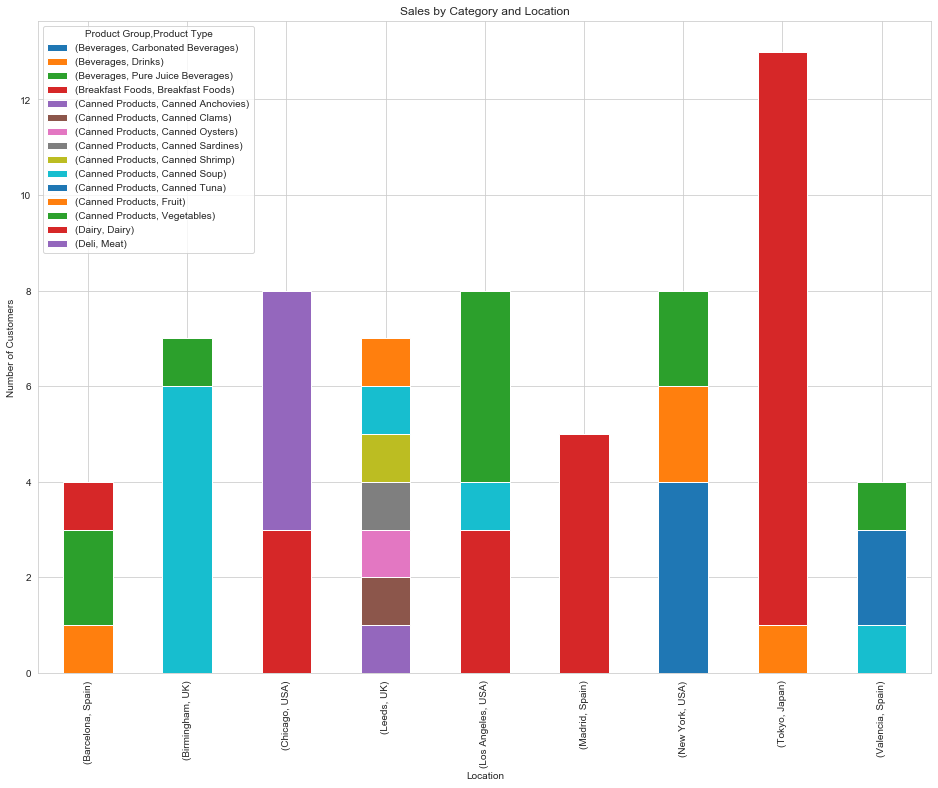

In [37]:
# Group the sales data by city, region, product group, and product type
sales_by_category = final.groupby(['City', 'Region', 'Product Group', 'Product Type'])['Customer'].count().reset_index()

# Sort the sales data by the number of customers and display the top 10
top_customers = final.groupby(['Customer'])['Sales Rep Name'].count().sort_values(ascending=False)[:10]

# Visualize the sales data by category using a stacked bar chart
fig, ax = plt.subplots(figsize=(16, 12))
sales_by_category.pivot_table(values='Customer', index=['City', 'Region'], columns=['Product Group', 'Product Type']).plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Sales by Category and Location')
ax.set_xlabel('Location')
ax.set_ylabel('Number of Customers')
plt.show()

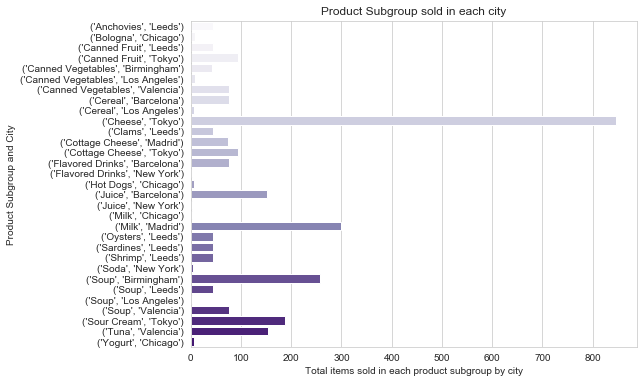

In [33]:
#Calculate the total number of items sold in each product subgroup by city
total_items_by_subgroup = final.groupby(['Product Sub Group', 'City'])['City Code'].sum()

#Create a horizontal bar chart to visualize the total number of items sold in each product subgroup by city
plt.figure(figsize=(8, 6))
sns.barplot(x=total_items_by_subgroup.values, y=total_items_by_subgroup.index, palette='Purples')
plt.xlabel('Total items sold in each product subgroup by city')
plt.ylabel('Product Subgroup and City')
plt.title('Product Subgroup sold in each city')
plt.show()